<a href="https://colab.research.google.com/github/majorquev/DBDC_202309_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/C8/Clase8_1_Testeo_de_normalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 7: Normalidad
## Análisis de un caso

**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

En esta seción usted generará un breve anáisis descriptivo del comportamiento de las acciones de la empresa Mc'Donalds. Para ello ustede deberá instalar la ibrería `quantmod`, la cual disponibilizará funciones con las que se podrá acceder de manera sencilla a diferentes activos financieros y sus series históricas.


In [3]:
library(quantmod) # debe instalarla de ser necesario
library(ggplot2)
library(dplyr)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.       

In [2]:
#install.packages("quantmod")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’




La siguiente celda de código le permitirá cargar la serie histórica desde enero de 2007 hasta la fecha (día anterior). Dicha serie contiene la información del volumen, el valor de apertura, cierre, y cierre ajustado, en dólares.


In [4]:
serie <- getSymbols("MCD", auto.assign = FALSE)
class(serie)
head(serie)

[1] "xts" "zoo"

           MCD.Open MCD.High MCD.Low MCD.Close MCD.Volume MCD.Adjusted
2007-01-03    43.65    44.38   43.50     43.87    7579100     27.33884
2007-01-04    43.75    43.86   42.87     43.54    9776100     27.13319
2007-01-05    43.40    43.82   43.34     43.54    5701000     27.13319
2007-01-08    43.50    43.85   43.25     43.71    4538500     27.23913
2007-01-09    43.86    44.15   43.59     43.79    6832800     27.28900
2007-01-10    43.78    44.29   43.46     44.26    6374800     27.58188

In [5]:
tail(serie)

           MCD.Open MCD.High MCD.Low MCD.Close MCD.Volume MCD.Adjusted
2023-11-14   270.00   271.66  269.35    271.49    2647800       271.49
2023-11-15   272.43   273.10  269.02    270.39    2575900       270.39
2023-11-16   271.07   276.16  271.03    276.12    3593700       276.12
2023-11-17   276.55   277.12  275.15    275.75    2604800       275.75
2023-11-20   275.35   279.80  275.02    279.03    3499400       279.03
2023-11-21   279.87   280.67  278.43    280.47    2940800       280.47

Note que este objeto es de la clase _xts_ y _zoo_, idóneas para trabajar con series de tiempo.
Algunas ventajas de trabajar con objetos de esta clase:
 * Permite visualizar de manera rápida un conjunto de series.
 * Varios modelos implementados en R y sus paquetes,está programados para manipular series de tiempo en este formato.

Si bien el objetivo no es ahondar en la teoría de series de tiempo, R ofrece algunas funcionalidades como las siguientes.

### Graficar

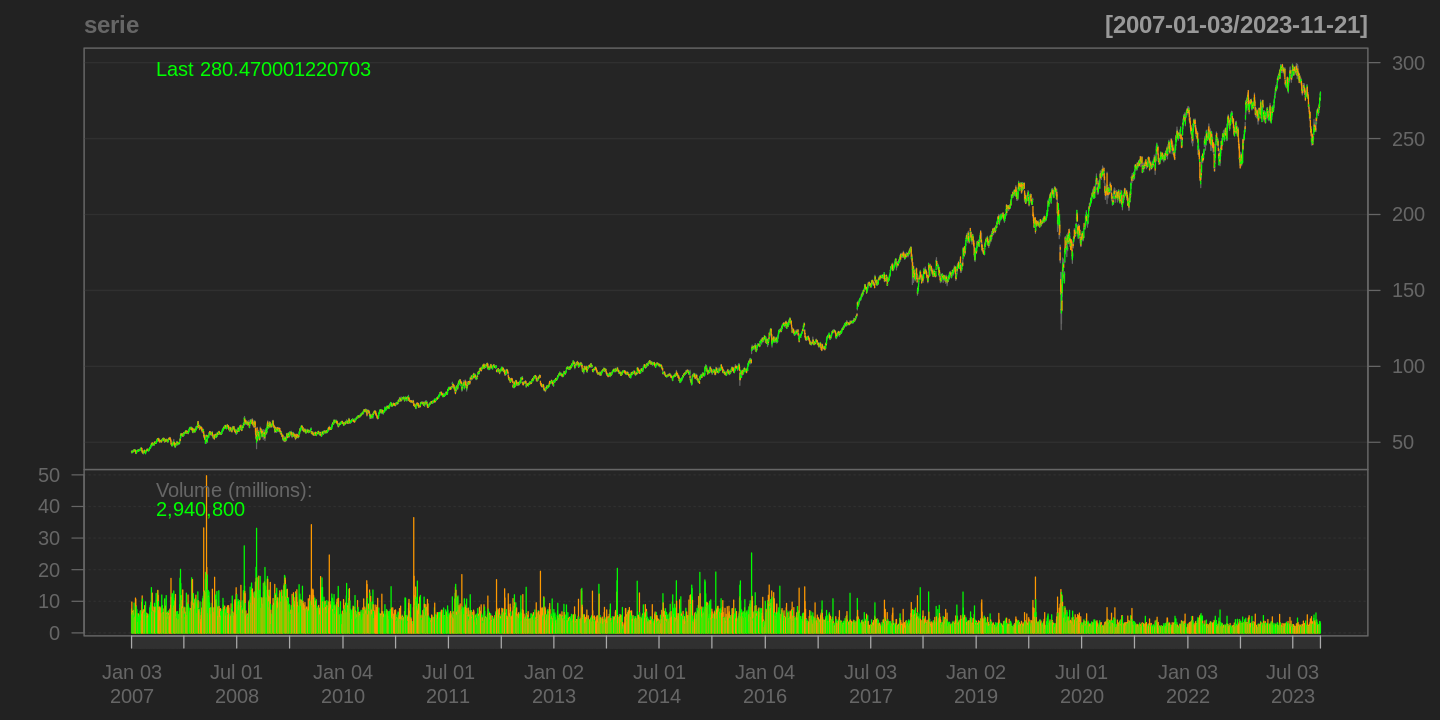

In [6]:
options(repr.plot.width=12, repr.plot.height=6)
#require(TTR)
chartSeries(serie)

### Ajustar un modelo y generar predicciones
Existen diversas maneras de modelar una serie de tiempo, por ejemplo mediante modelos arima, garch, entre otros. Otra alternativa es a través de suavizados exponenciales, los cuales permiten modelar de manera adtiva o multiplicativa elementos como el error, la tendencia y la estacionalidad en una serie de tiempo (ETS, por los componentes Error, Trend, y Seasonality).

El objetivo de este ejemplo no es entender la teoría que hay detrás ni tampoco evaluar la pertinenia o calidad del modelo ajustado, si no que mostrar potecniales usos de R en cuánto al manejo de series de tiempo. Para más detalles pueden consultar las referencias del curso.

In [7]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘quadprog’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’




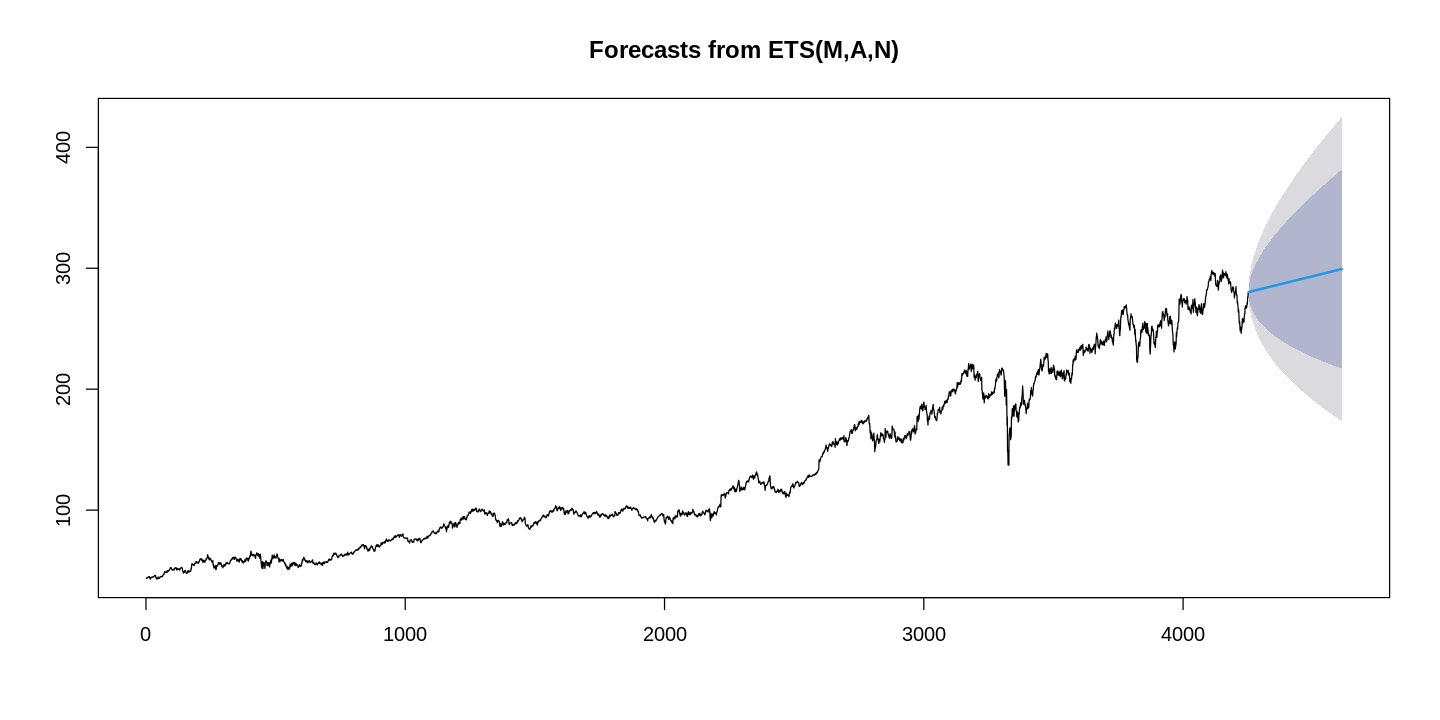

In [8]:
mcd_close <- Cl(serie) # se extrae la columna MCD.Close
mod_t <- forecast::ets(mcd_close) # se ajustan de manera automatica un suavizado exponencial.
plot(forecast::forecast(mod_t,360)) # se genearn predicciones con un horizonte futuro de 360 días y se grafican dichos valores con sus respectivas bandas de confianza.

### Descomponer una serie
Una serie de tiempo posee elementos caraterísticos comola tendencia, estacionalidad y componente de error. En R existen funciones que permiten generar dichas descomposiciones de manera automática.
Por ejemplo, la data co2 contiene los niveles de c02 expresados en partes por millon (ppm) and reportados en la fracción de escala nanométrica preliminar del 1997

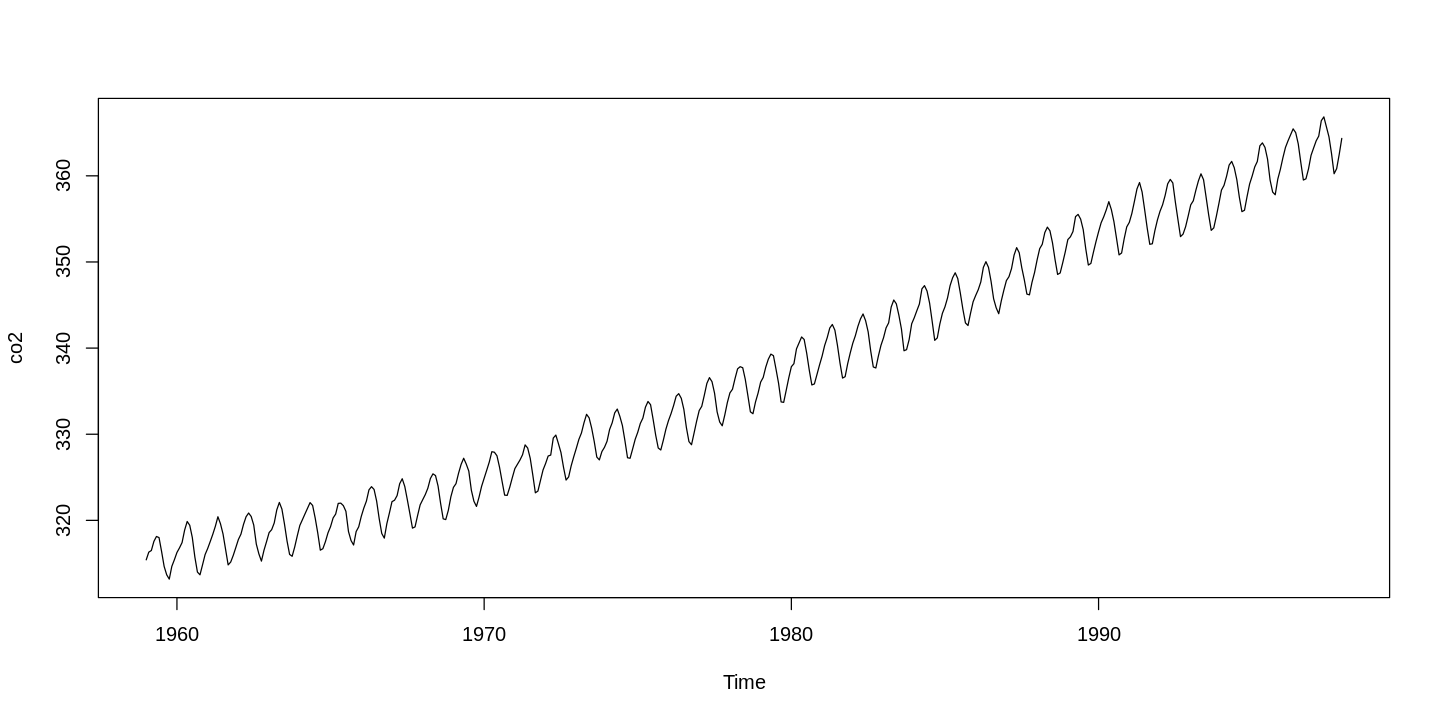

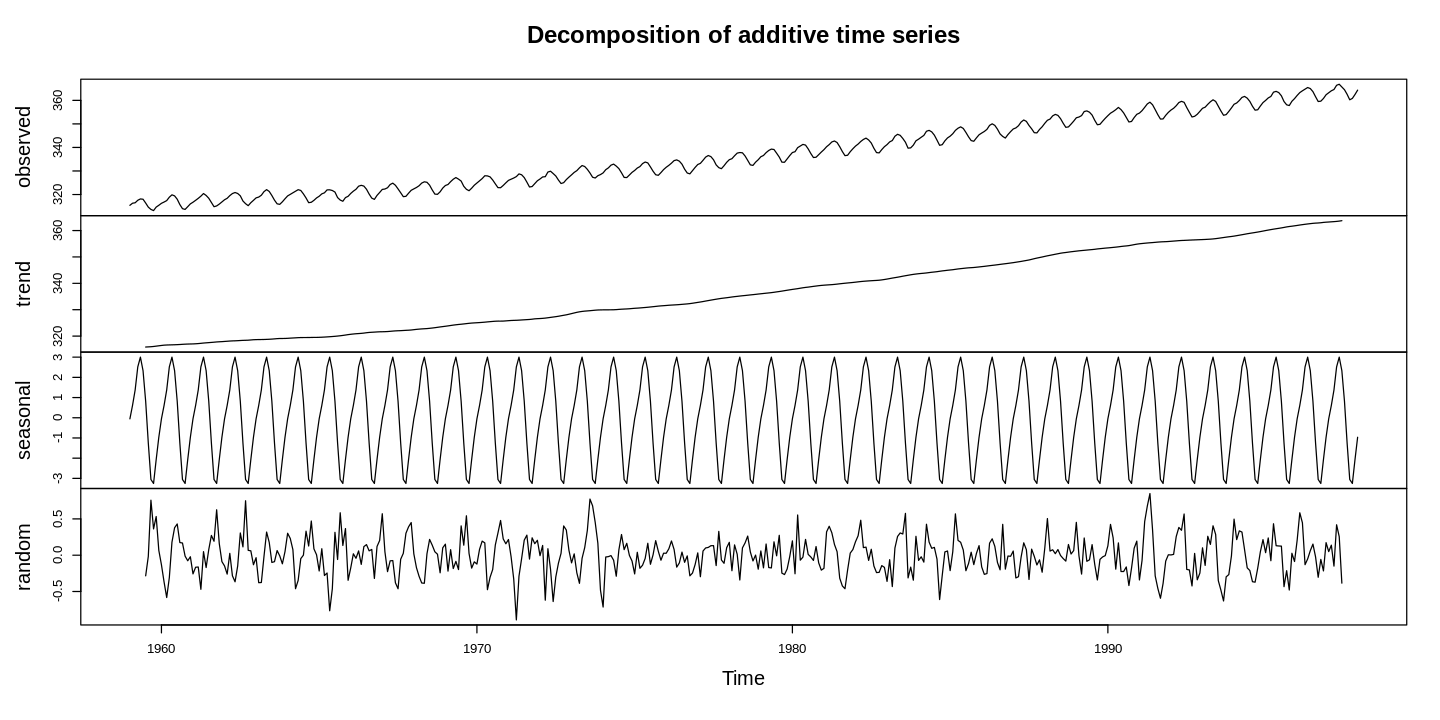

In [9]:
plot(co2)
plot(decompose(co2))

## Análisis del valor ajustado
### Extracción de indicadores
Extraemos los indicadores asociados al activo MCD.

In [10]:
serie_df <- data.frame(
                fecha = index(serie),
                coredata(serie)
            )
head(serie_df)

,fecha,MCD.Open,MCD.High,MCD.Low,MCD.Close,MCD.Volume,MCD.Adjusted
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2007-01-03,43.65,44.38,43.50,43.87,7579100,27.33884
2,2007-01-04,43.75,43.86,42.87,43.54,9776100,27.13319
3,2007-01-05,43.40,43.82,43.34,43.54,5701000,27.13319
4,2007-01-08,43.50,43.85,43.25,43.71,4538500,27.23913
5,2007-01-09,43.86,44.15,43.59,43.79,6832800,27.28900
6,2007-01-10,43.78,44.29,43.46,44.26,6374800,27.58188


### Visualizaciones del valor ajustado
Podemos generar visualizaciones del valor ajustado.


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


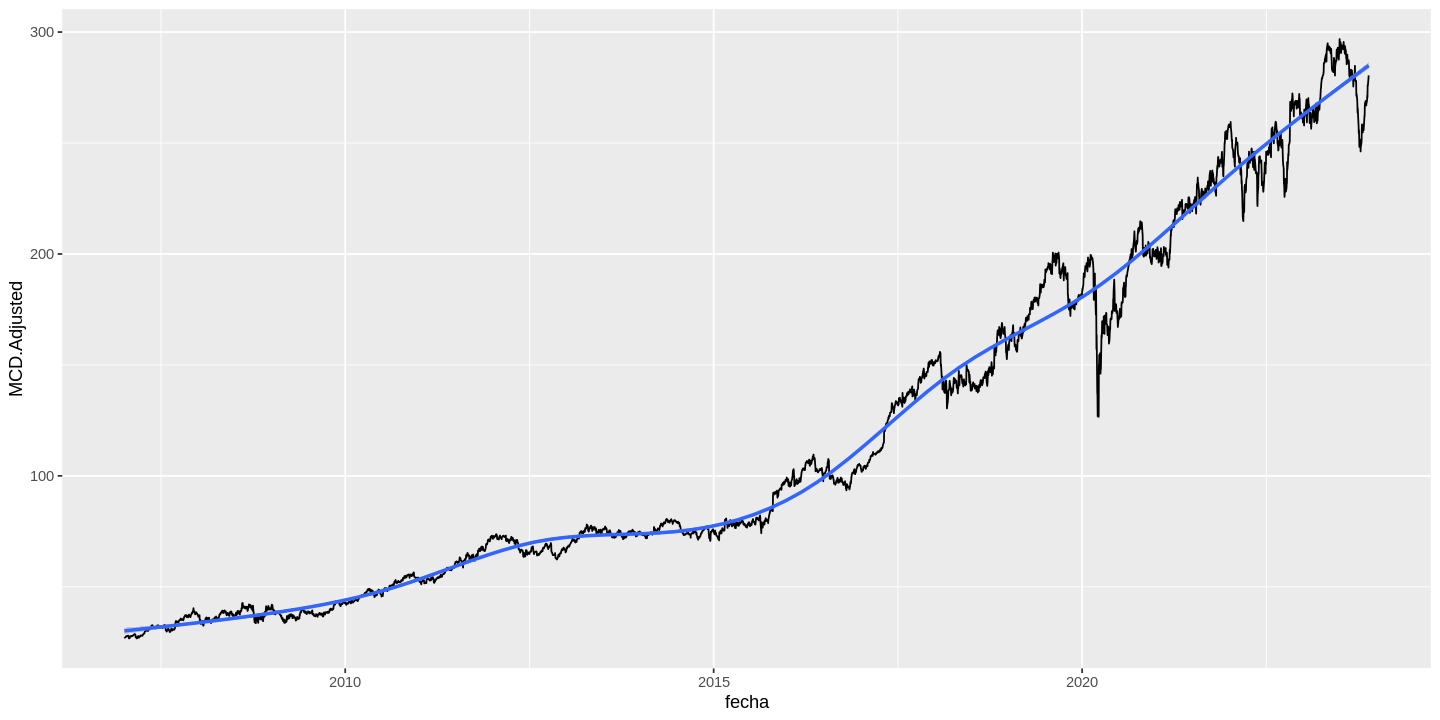

In [12]:
serie_df %>%
  ggplot() +
  aes(x = fecha, y = MCD.Adjusted) +
  geom_line() +
  geom_smooth()


# Se observa engenearl una tendencia al alza del valor de la acción de Mc'Donalds. Particularmente hacia fines del 20015 se puede apreciar una notable alza que se sostiene hacia mediados de 2019. Ya para el 2020 se evidencia una fuerte baja, probablemente debido  la pandemia.

In [15]:
# b) Describir el comportamiento año a año.
resumen <- serie_df %>%
  mutate(anio = lubridate::year(fecha)) %>%
  group_by(anio) %>%
  summarise(mean_adjusted = mean(MCD.Adjusted),
            sd_adjusted = sd(MCD.Adjusted),
            cv_adjusted = sd_adjusted/abs(mean_adjusted))

resumen


#  Siendo los años 2017, 2019 y 2020, con mayor variabilidad en el precio de la acción.
# Como complemento a la airmación anterior, se muestran los siguientes gráficos de caja.



anio,mean_adjusted,sd_adjusted,cv_adjusted
<dbl>,<dbl>,<dbl>,<dbl>
2007,31.89887,3.525722,0.11052811
2008,37.60846,2.272882,0.06043541
2009,38.43072,2.291057,0.05961525
2010,49.09744,4.036011,0.08220410
2011,59.96827,5.880677,0.09806314
2012,67.96733,3.071350,0.04518862
2013,73.84535,2.201132,0.02980732
2014,75.62243,2.471155,0.03267754
2015,81.50254,6.888762,0.08452205


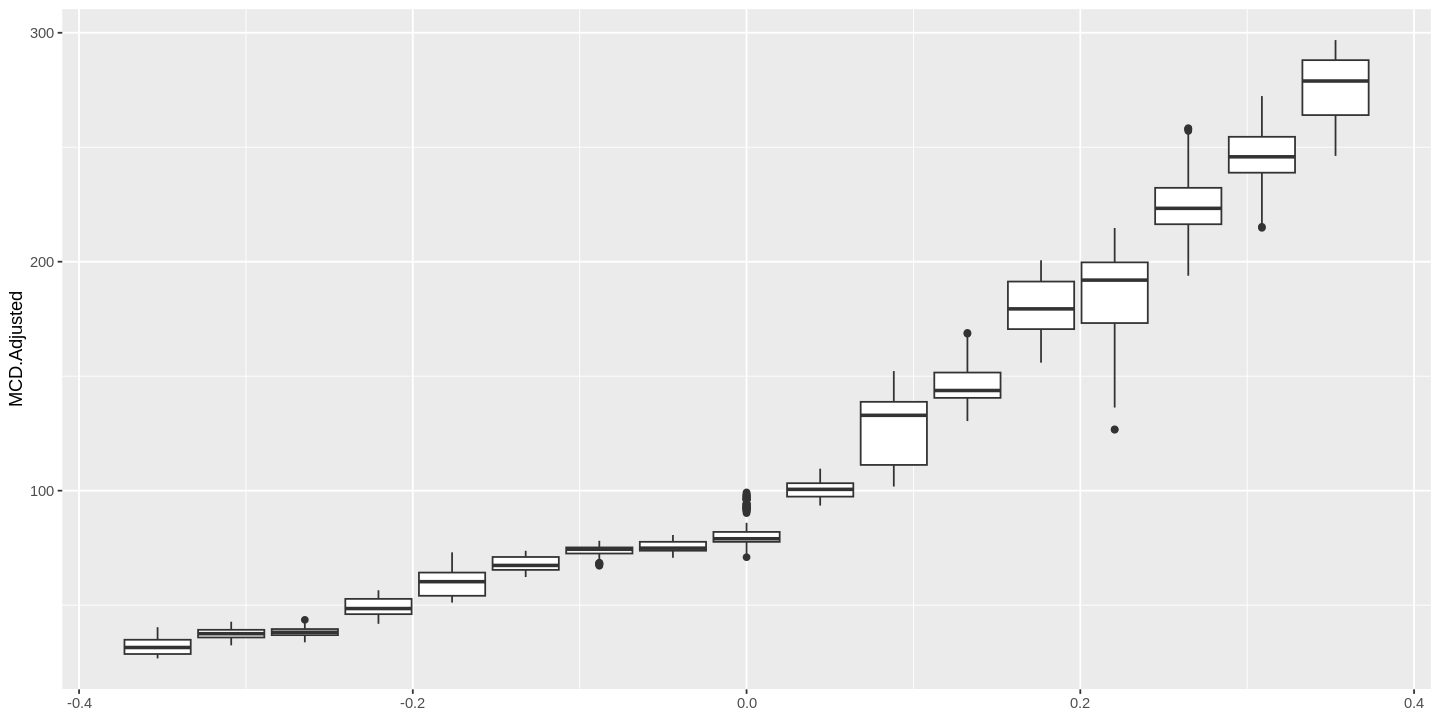

In [17]:
serie_df %>%
  mutate(anio = lubridate::year(fecha)) %>%
  ggplot() +
  aes(group = anio, y = MCD.Adjusted) +
  geom_boxplot()

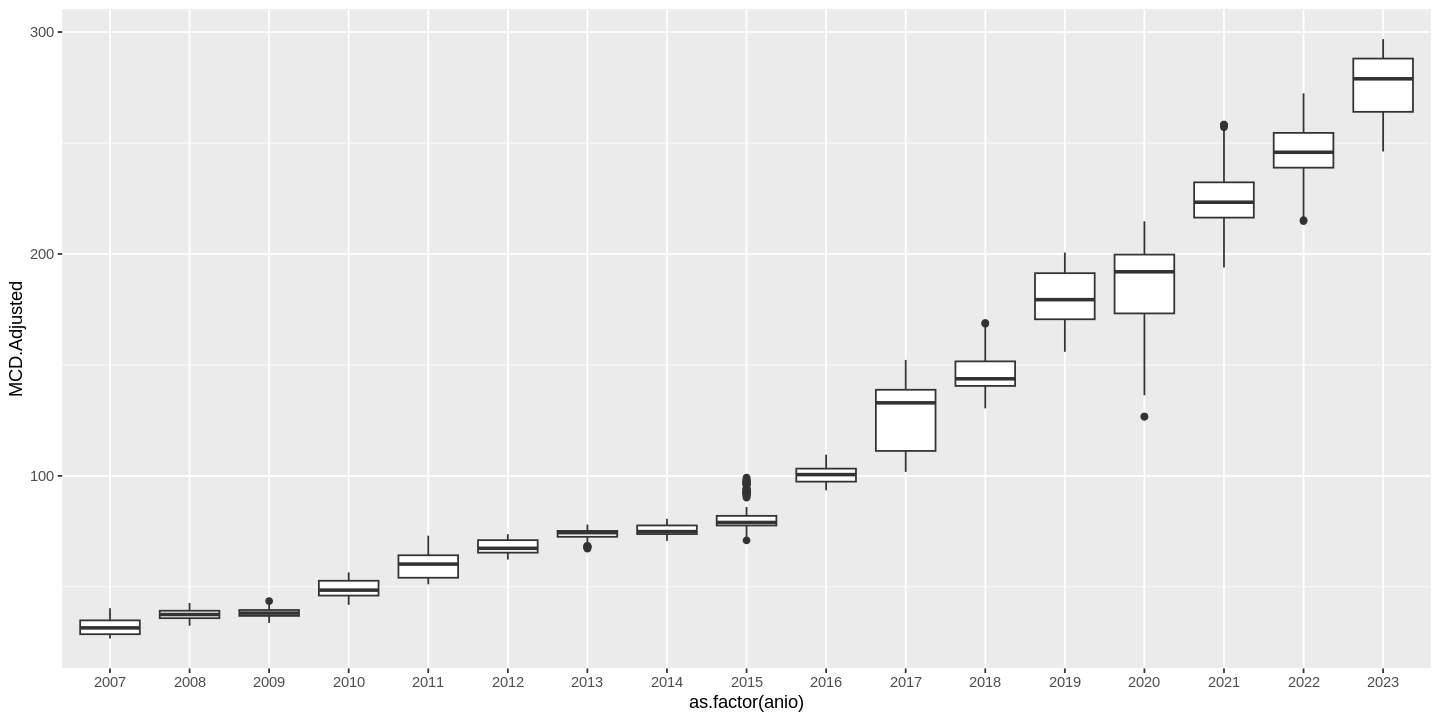

In [18]:
serie_df %>%
  mutate(anio = lubridate::year(fecha)) %>%
  ggplot() +
  aes(x = as.factor(anio), y = MCD.Adjusted) +
  geom_boxplot()

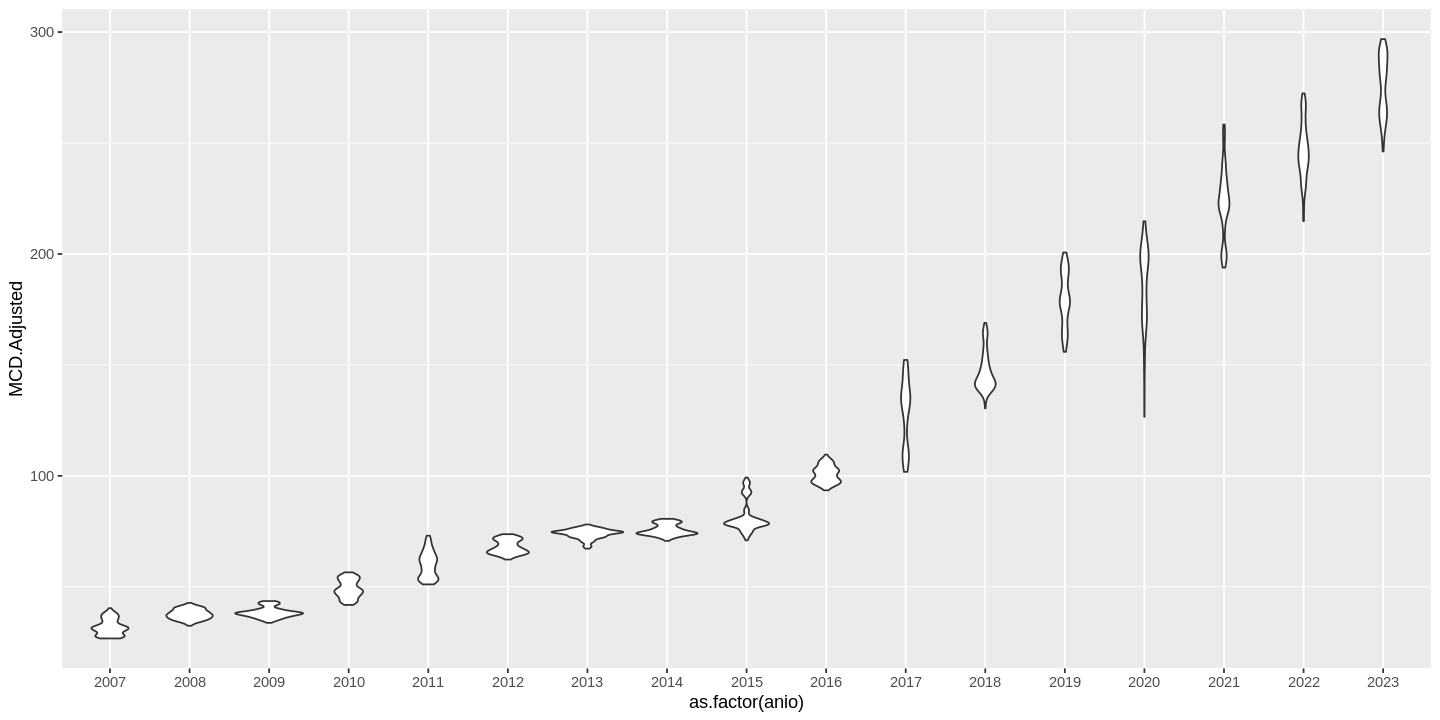

In [19]:
serie_df %>%
  mutate(anio = lubridate::year(fecha)) %>%
  ggplot() +
  aes(x = as.factor(anio), y = MCD.Adjusted) +
  geom_violin()

### Distribución del valor ajustado

#### Histograma de frecuencias relativas y estimación de densidad dada por la lafunción `geom_density`


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


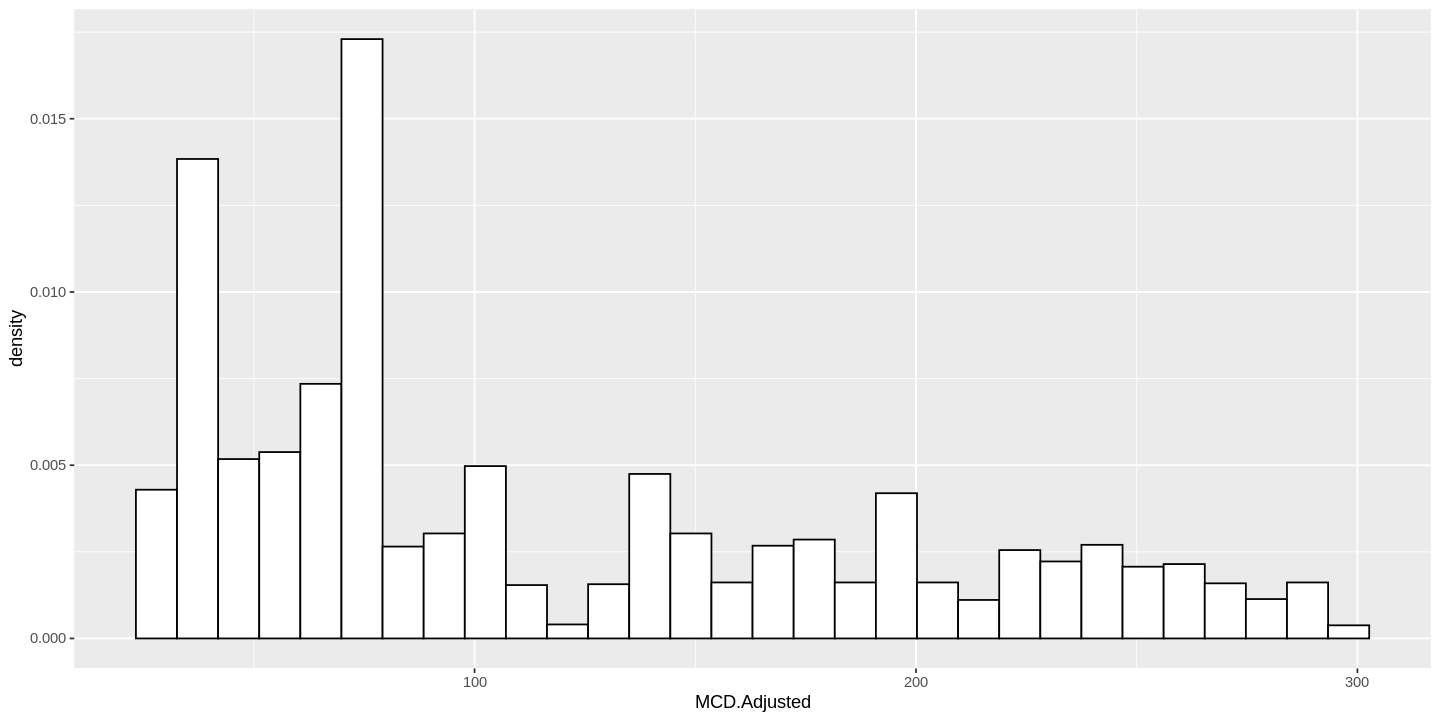

In [22]:
serie_df %>%
  ggplot() +
  aes( x = MCD.Adjusted, y = after_stat(density)) +
  geom_histogram(color = "black", fill = "white")
# Evidententemente la distribución del valor de la acciòn no es simétrica y además presenta dos picks (dos modas), por lo que no se observa una distribución normal.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


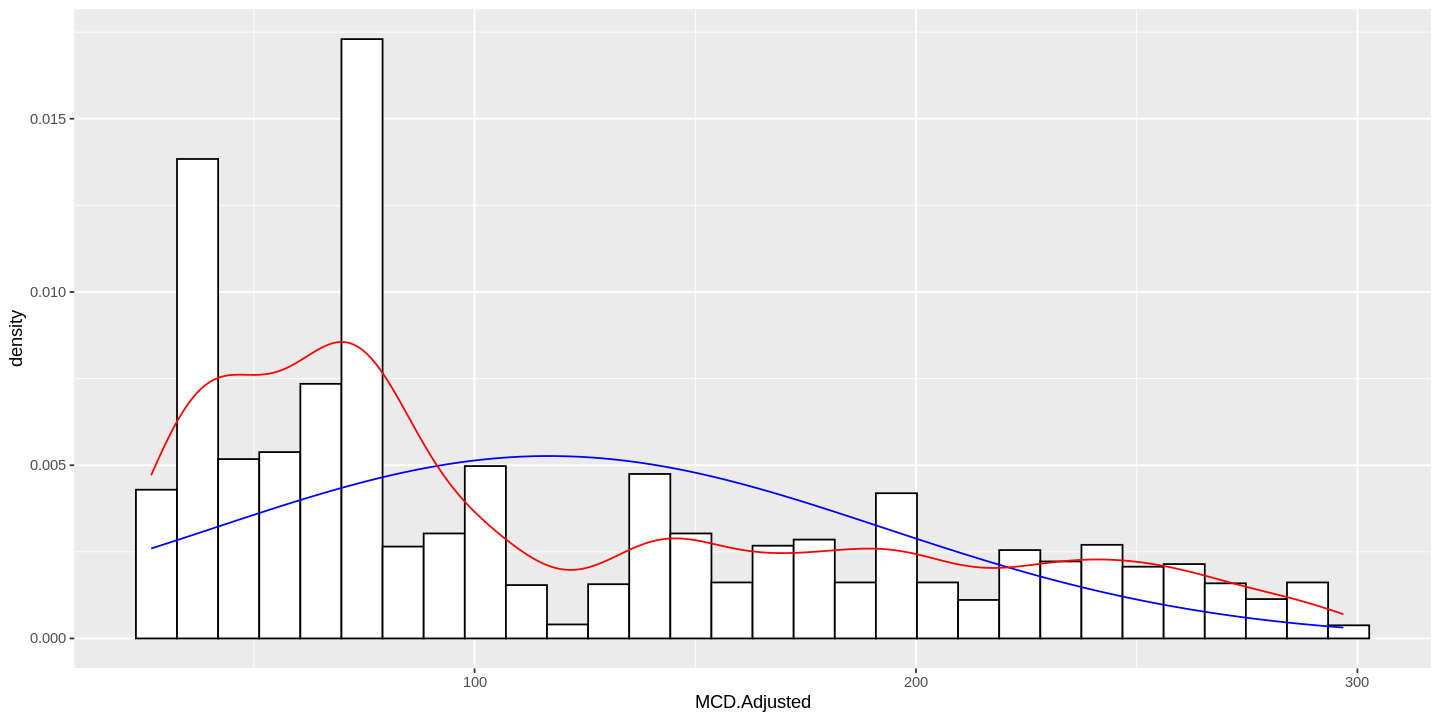

In [25]:
# Si ingenuamente asumimos normalidad y visualizamos la curva normal con los parámetros estimados.
serie_df %>%
  ggplot() +
  aes( x = MCD.Adjusted) +
  geom_histogram(aes(y = after_stat(density)),color = "black", fill = "white") +
  stat_function(
        fun = dnorm,
        args = list(mean = mean(serie_df$MCD.Adjusted), sd = sd(serie_df$MCD.Adjusted)),
        col = "blue"
    ) +
  geom_density(col = "red")

#### Sólo observaciones comprendidas entre las fechas 2008-11-01 y 2009-10-31 inclusive


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


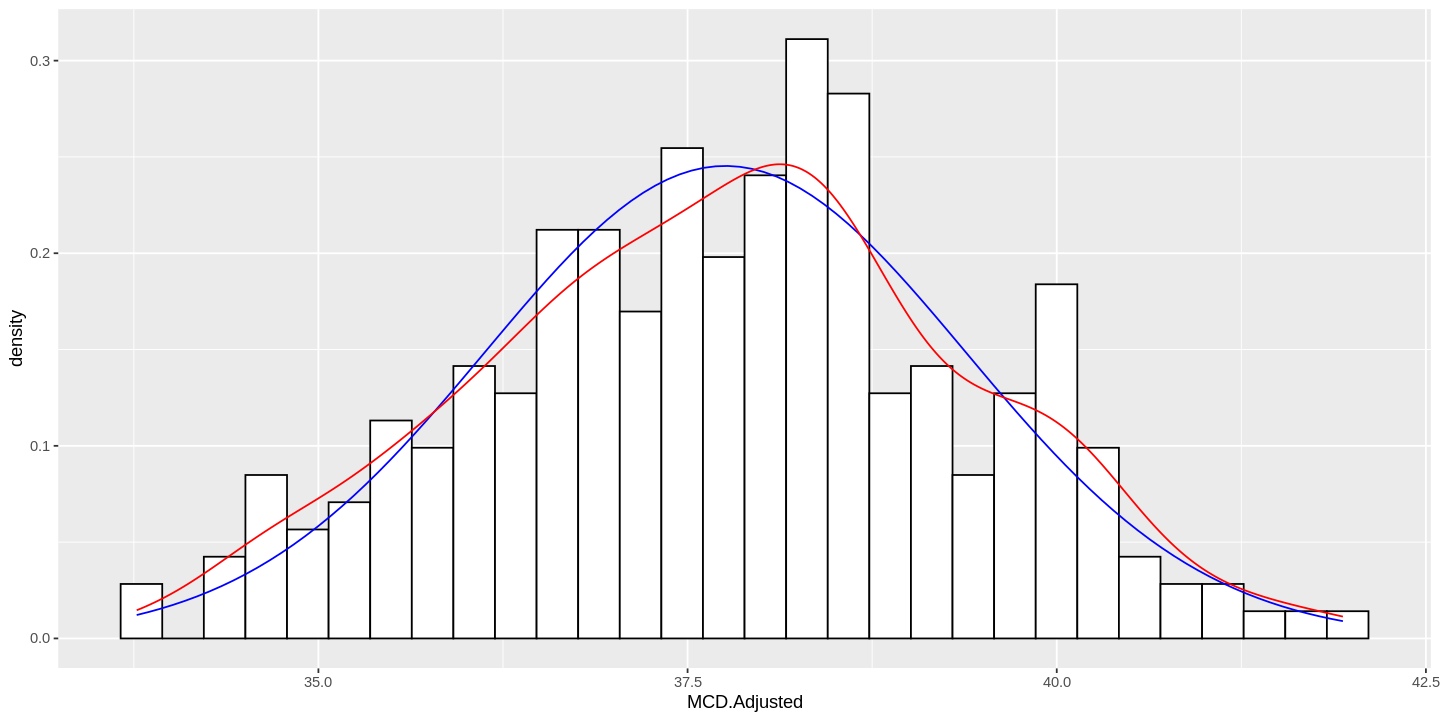

In [27]:
serie_filt <- serie_df %>%
  filter(fecha >= "2008-11-01" & fecha <= "2009-10-31")

serie_filt %>%
  ggplot() +
  aes( x = MCD.Adjusted) +
  geom_histogram(aes(y = after_stat(density)),color = "black", fill = "white") +
  stat_function(
        fun = dnorm,
        args = list(mean = mean(serie_filt$MCD.Adjusted), sd = sd(serie_filt$MCD.Adjusted)),
        col = "blue"
    ) +
  geom_density(col = "red") #Estimación no paramétrica vía Kernels.



#### Añadiendo densidad normal con parámetros estimados


In [ ]:
# Ya lo visualizamos....

## QQ-plots
Una manera gráfica de comparar distribuciones es a través de los gráficos quantile-quantile, también conocidos como `qq-plots`. Estos gráficos comparan los cuantiles entre dos distribuiones, de tal modo que si la gráfica entre ellos generan una "línea recta", se asume que ambas distribuciones coinciden. Este método es útil además, cuando se quiere comparar la distribución (desconocida) de una muestra contra una distribución  conocida,  como por ejemplo una normal,  donde se contrastan los cuantiles observados versus los teóricos. A modo de ejemplo, consideremos una muestra aleatoria de 1000 observaciones provenientes de una distribución normal con media 10 y desviación estándar. Podemos comparar los cuantiles observados con lo cuantiles teóricos de una normal estántar a través de la función qqnorm().

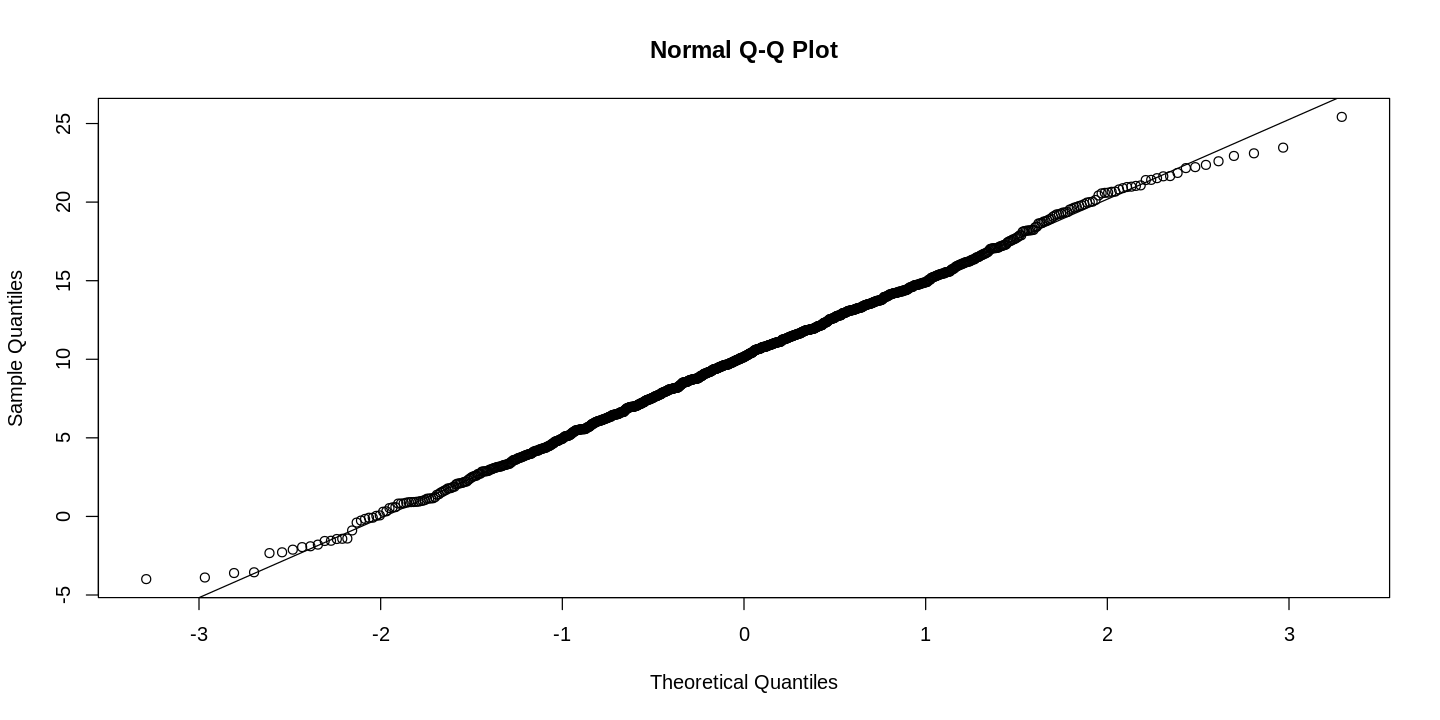

In [31]:
set.seed(6669)
m1_norm <- rnorm(1000,mean = 10, sd = 5)
qqnorm(m1_norm)
qqline(m1_norm)

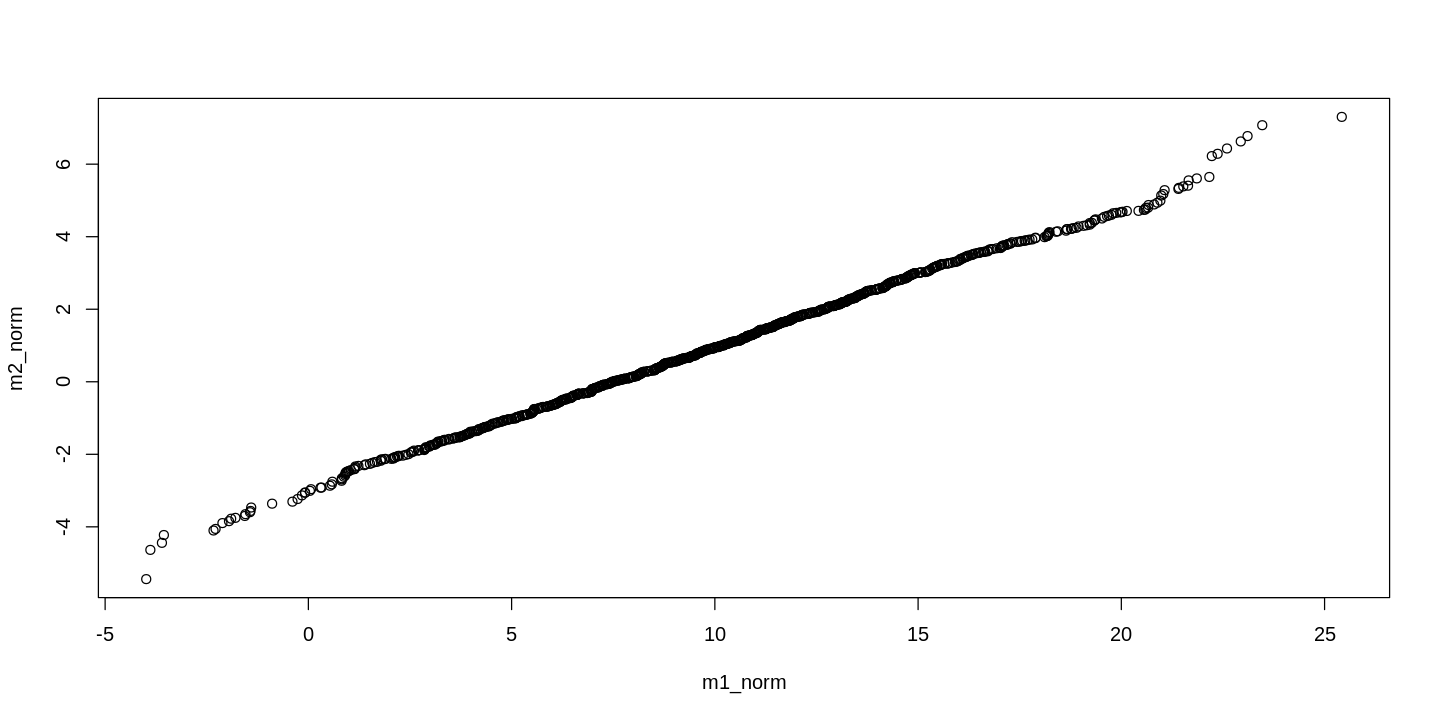

In [32]:
m2_norm <- rnorm(2000,mean = 1, sd = 2)
# La función qqplot en cambio, compara los cuantiles observados enre dos muestras, por ejeplo, si comparamos m1_norm con m2_norm se observa el siguiente gráfico de cuantiles

qqplot(m1_norm,m2_norm)

Si en cambio contrastamos contra una normal,los cuantiles de una muestra que se be que no es normal, se observarán asimetrías en el gráfico de cuantiles. A modo de ejemplo, comparemos una muestra de una variable aleatoria con distribuciòn de T-student con 3 grados de libertad contra los cuantiles teóricos de una normal estándar.

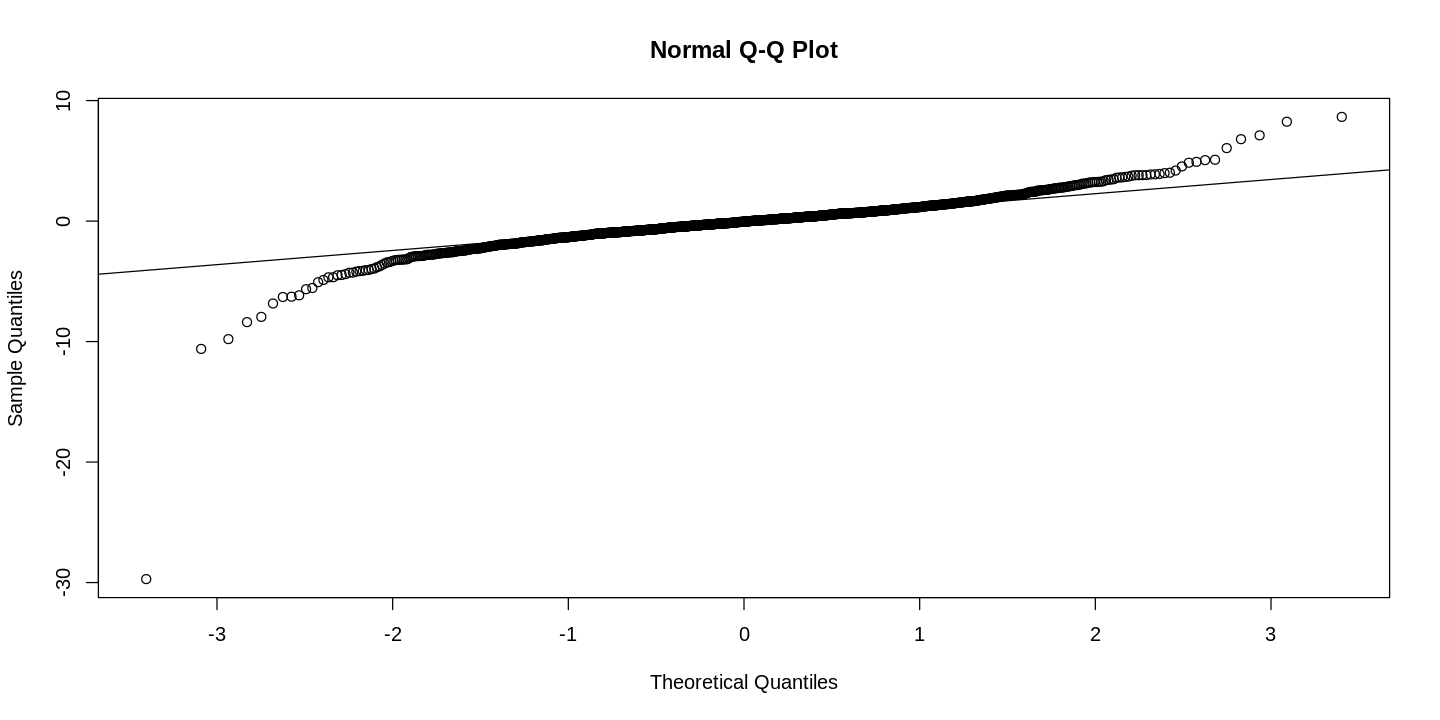

In [35]:
m3_t <- rt(1500,3)
qqnorm(m3_t)
qqline(m3_t)

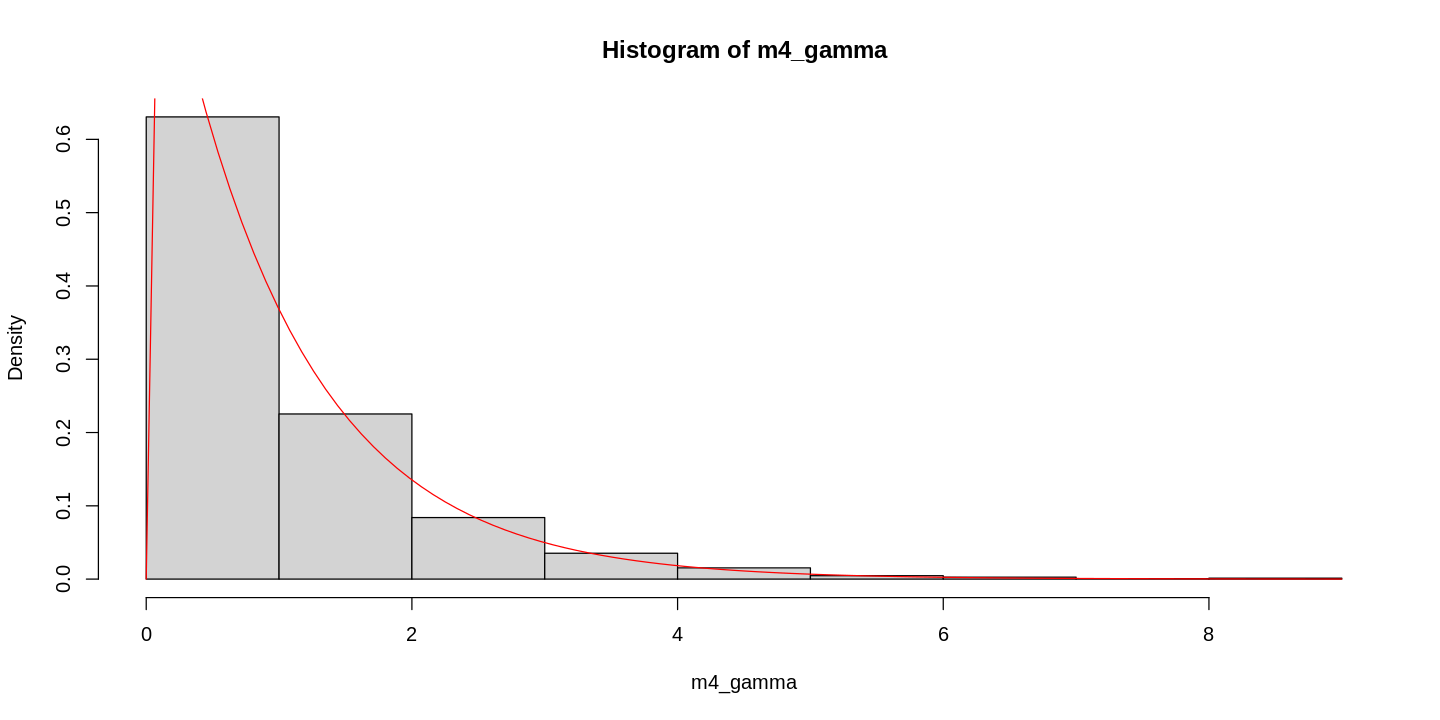

In [36]:
# Se puede observar una forma de "S", lo que indica que las colas de la muestra son más "pesadas" que las colas de lo normal. Es decir,  los primeros cuantiles de la muetra son menores que los pimeros cuantiles de una dist. normal, y los cuantiles superiores de la uestra sonmayores que los cuantiles superiores de la distribuciòn normal.

# Sólo recoradar que la distribuciòn t-student es similar a la normal pero con colas más "pesadas".(https://en.wikipedia.org/wiki/Student%27s_t-distribution)

# podemos Replicar el ejercicio con una distribución asimétrica como por ejemplo la distribuciòn gamma, donde se observa que los cuantiles iferiores y superiores son siempre mayores en la muestra gamma.
m4_gamma <- rgamma(1500,1,1)
hist(m4_gamma, freq = F)
curve(dgamma(x,1,1), add = T, col = "red")

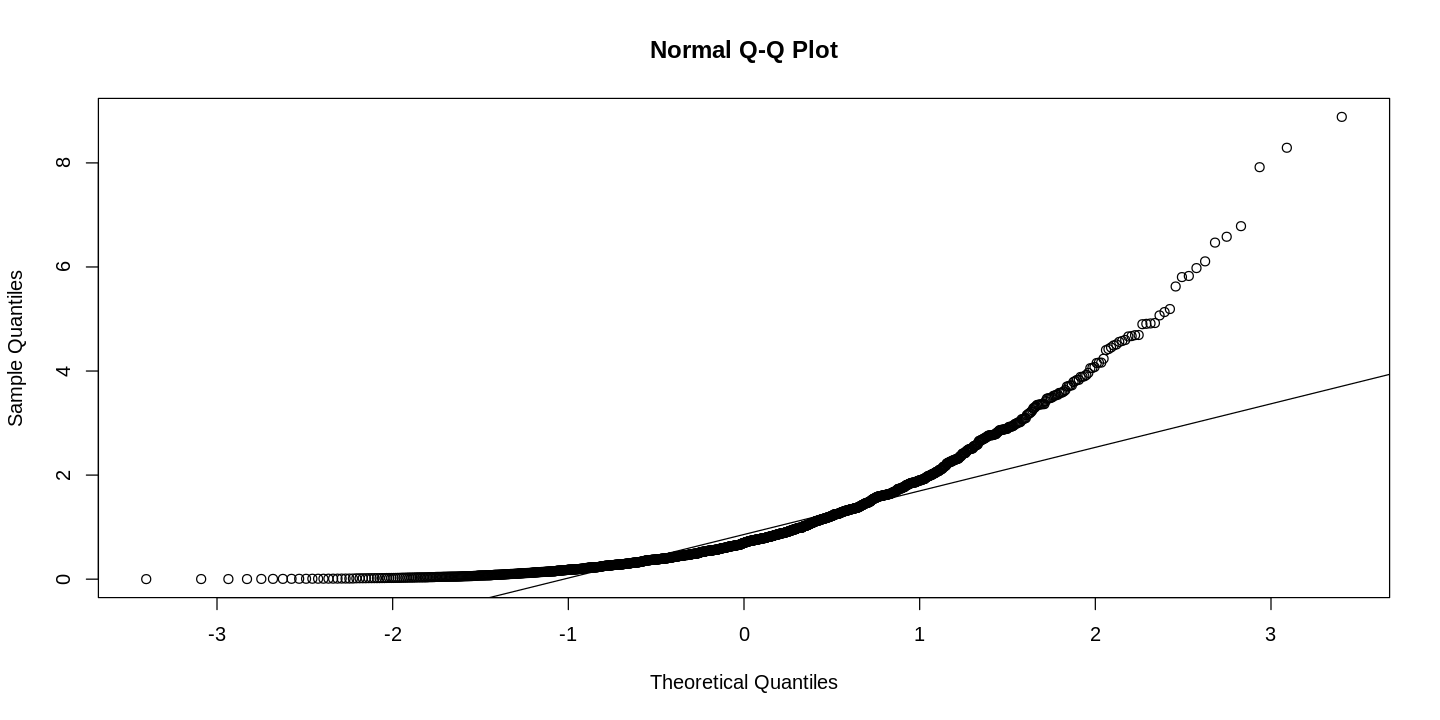

In [37]:
qqnorm(m4_gamma)
qqline(m4_gamma)

### QQ-plot del valor ajustado
Consideramos el mismo período de observación entre 2008-11-01 y 2008-10-31 inclusive.

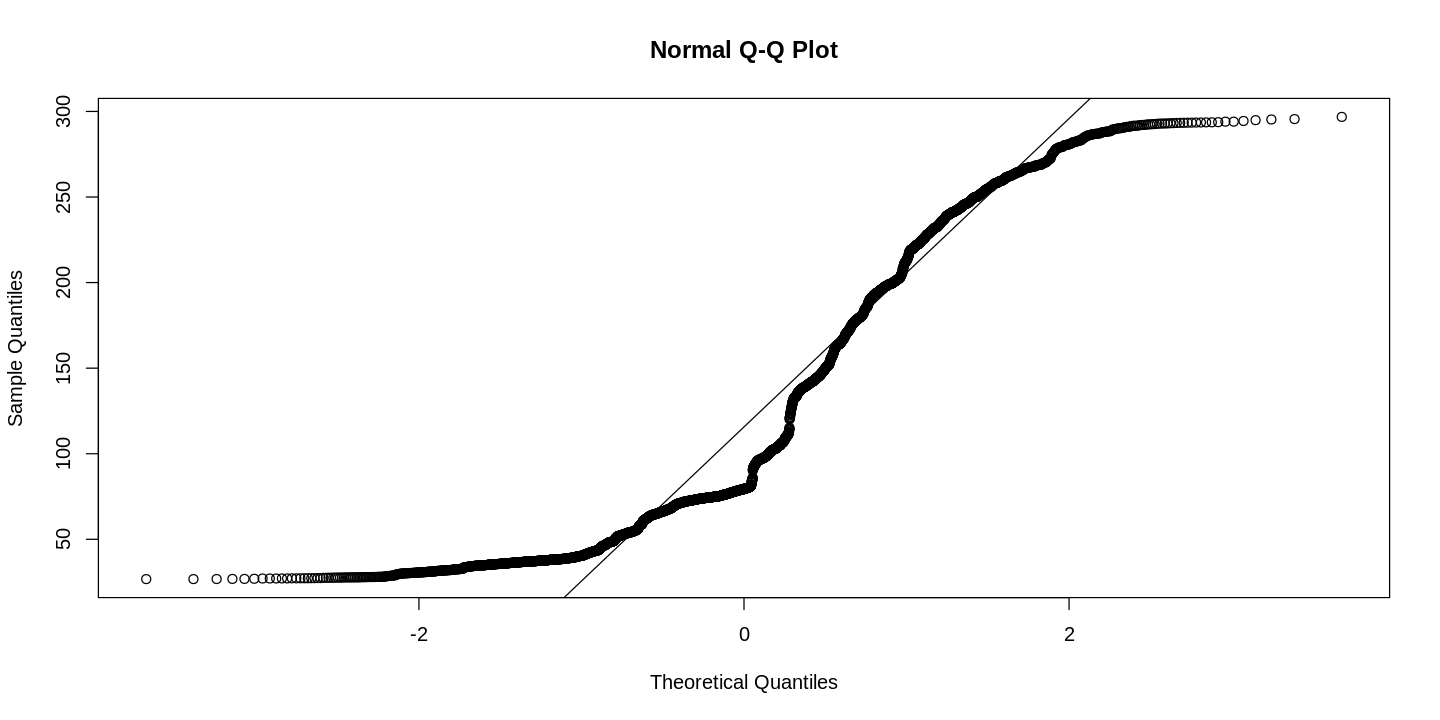

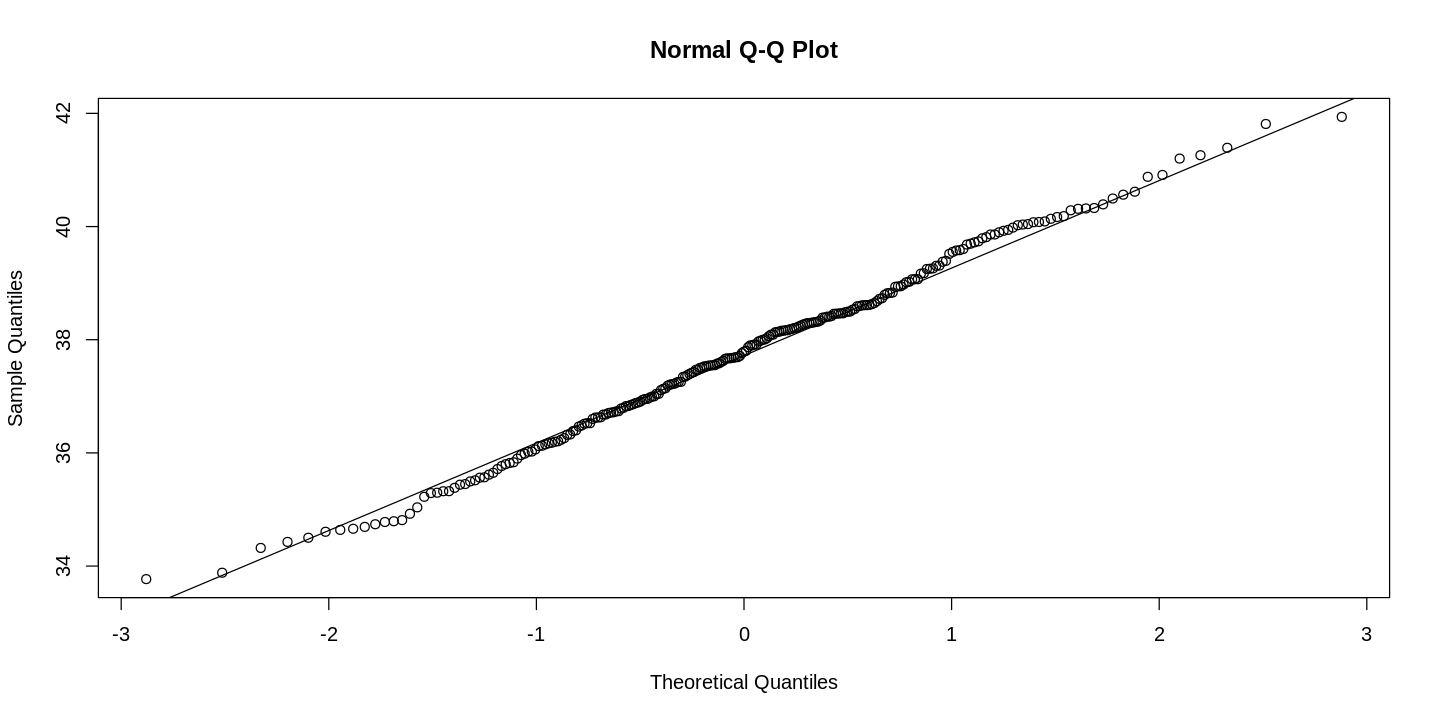

In [40]:
 # Gráficamente se observa que los cuantiles observados se acercan bastantes a los teóricos de una distribuciòn normal, por o que pareciera ser pertinente el supuesto de normalidad.
 qqnorm(serie_df$MCD.Adjusted)
 qqline(serie_df$MCD.Adjusted)

qqnorm(serie_filt$MCD.Adjusted)
 qqline(serie_filt$MCD.Adjusted)

## Test de normalidad
Si bien la inspecón visual es útil para generar ciertas conjeturas, es necesario contar con mecanismos más robustos para validar ciertos supuestos como lo es el caso de el de normalidad en una distribución. Una manera de probar si una mustra proviene de una distribución normal, es a través del test de shapiro-wilkk, cuya hipótesis nula establece que la muestra analizada proviene de una distribución normal (https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test).

A modo de ejemplo, consideremos dos muestras, una normal(`m1_norm`) y otra no normal (la muestra gamma `m4_gamma` del ejemploo anterior). La función shapiro.test() evalúa la hipótesis nula, de que la muestra analizada tiene una distribución normal. Así, con un nivel de significancia del 5%, se rechaza la hipótesis de nornalidad para valores-p  menores a 0.05.



In [42]:
# no se rechaza la hipótesis nula, por lo que se puede establecer con un 5% de significancia que la muestra m1_norm proviene de una distribución normal.
# se rechaza la hipótesis nula, por lo que se puede establecer con un 5% de significancia que la muestra m4_gamma NO proviene de una distribución normal.
shapiro.test(m1_norm)
shapiro.test(m4_gamma)


	Shapiro-Wilk normality test

data:  m1_norm
W = 0.99854, p-value = 0.5831



	Shapiro-Wilk normality test

data:  m4_gamma
W = 0.79237, p-value < 2.2e-16


### Test de normalidad para el valor ajustado


In [44]:
shapiro.test(serie_df$MCD.Adjusted)# se rechaza la hipótesis nula, por lo que se puede establecer con un 5% de significancia que la muestra m4_gamma NO proviene de una distribución normal.
shapiro.test(serie_filt$MCD.Adjusted)#no se rechaza la hipótesis nula, por lo que se puede establecer con un 5% de significancia que la muestra m1_norm proviene de una distribución normal.


	Shapiro-Wilk normality test

data:  serie_df$MCD.Adjusted
W = 0.88539, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  serie_filt$MCD.Adjusted
W = 0.99486, p-value = 0.5619


### ¿Cómo se interpreta el valor-p?
Es posible interpretar el valor-p como  la probabilidad de rechazar la hipótesis nula cuando esta es verdadera. Así, fijando un nivel del 5%, se tendrá que un test cuyo valor-p sea menor a 0.05, asegurará que en el 5% de las veces que se realice el experimento, se estará rechazando la hipótesis nula de manera incorrecta (vale decir cuando esta era verdadera).
Para entender este fenómeno, podemos generar la siguiente simulación:



In [45]:
set.seed(2020)
valores_p <- c() # vector vacío

for (i in 1:3000){
    muestra <- rnorm(2000) # muestra aleatoria de 2000 obs de una normal con media 0 y sd igual a 1.
    test <- shapiro.test(muestra)
    valores_p <- c(valores_p,test$p.value)
}

In [46]:
valores_p

[1] 0.2531638682 0.2400116889 0.6144106267 0.2883780636 0.6018274446
   [6] 0.2412103791 0.9203092555 0.6921640400 0.6151397420 0.0787446670
  [11] 0.2835930987 0.7804346288 0.8072305423 0.0756388957 0.8431467067
  [16] 0.9911148100 0.7912731168 0.6087394239 0.4697370633 0.2633677668
  [21] 0.1568260739 0.6945953214 0.5304857894 0.3990068971 0.1571052377
  [26] 0.3551032162 0.0130308856 0.0161194921 0.8221016994 0.3149751589
  [31] 0.9109710598 0.7858585515 0.4470444679 0.2589506959 0.2800617839
  [36] 0.6266022477 0.6080053998 0.3204007395 0.7445590268 0.3285462625
  [41] 0.2153007797 0.2516281663 0.6889298714 0.4419497746 0.4232268125
  [46] 0.0166589193 0.5928469216 0.6347818626 0.2676724650 0.6184492969
  [51] 0.5105280087 0.6530202025 0.2379668369 0.0377998443 0.0102651122
  [56] 0.7463083638 0.0222765669 0.2347240838 0.8372816526 0.4764151407
  [61] 0.4747865601 0.6093301194 0.5290334695 0.0066754693 0.4214462431
  [66] 0.6451801450 0.1213473685 0.8916191875 0.3991047874 0.8827360967
  [71] 0.2876539756 0.7672915713 0.5459599662 0.6289475744 0.7530439768
  [76] 0.7009916984 0.7181176677 0.2295295117 0.8414746330 0.0658259771
  [81] 0.0969116962 0.8214503456 0.5576985656 0.8216029500 0.6374143933
  [86] 0.3805543556 0.1244122430 0.0553152184 0.1435475087 0.6308776444
  [91] 0.0843524359 0.3424439908 0.5340244543 0.0085220109 0.4505736939
  [96] 0.5168157201 0.2411183739 0.4953941266 0.0599333508 0.4779599513
 [101] 0.2886899513 0.9892748916 0.7819035079 0.3522017176 0.6429480316
 [106] 0.8360444513 0.8889160966 0.4872324004 0.0493375174 0.9991274734
 [111] 0.7236438886 0.0034768638 0.8386291878 0.7370689200 0.1789695663
 [116] 0.0196517432 0.1774778149 0.2976444653 0.2088095674 0.0803563696
 [121] 0.5716770054 0.6048577006 0.2845334221 0.5804351131 0.4662418669
 [126] 0.8190636455 0.3673682655 0.8189281690 0.4945418501 0.5609642215
 [131] 0.7199551783 0.4793542639 0.8811754203 0.6985000793 0.4453416147
 [136] 0.6261785715 0.7660162320 0.5041321468 0.8918879171 0.8765722786
 [141] 0.3853741550 0.0833551642 0.5633879449 0.8733011285 0.1173955051
 [146] 0.8509672407 0.1773639430 0.9238422677 0.0199635856 0.1037671051
 [151] 0.7494630528 0.5297926276 0.5663749909 0.6634793255 0.1896719148
 [156] 0.0874100702 0.8706073825 0.5416944044 0.3789322788 0.5246903500
 [161] 0.1667963002 0.2237517383 0.6470443027 0.4450420789 0.6780773485
 [166] 0.3982681621 0.1436624391 0.2645297538 0.2470994409 0.2313791711
 [171] 0.0879915982 0.7023131766 0.9485841694 0.8960140222 0.4566346630
 [176] 0.8622644239 0.2611299422 0.5607931578 0.3371702211 0.3945490953
 [181] 0.8281710134 0.2585367060 0.0837194099 0.2316698869 0.5670764736
 [186] 0.3735346226 0.0810528679 0.7494162765 0.1789170295 0.5365204283
 [191] 0.2658068426 0.2338730290 0.6934151009 0.5443023043 0.6219957314
 [196] 0.5152822938 0.5778724276 0.1033296215 0.7606138460 0.4101122663
 [201] 0.4606795453 0.8592954930 0.1318272734 0.6691065558 0.7161368400
 [206] 0.9830365008 0.6287211122 0.7115997063 0.7163110008 0.5552765745
 [211] 0.6193538390 0.8168548378 0.9645168814 0.0588527997 0.3340465556
 [216] 0.2603110223 0.8827330792 0.7629597611 0.5504323752 0.1310038144
 [221] 0.4144561853 0.1438806003 0.7564235128 0.2506406482 0.0706286065
 [226] 0.0763671563 0.4242295780 0.8088058223 0.1734544745 0.5789070514
 [231] 0.3958890757 0.7322899520 0.7876720445 0.2363324852 0.7033668364
 [236] 0.7865429235 0.3715609428 0.3705857648 0.5927573935 0.5927367976
 [241] 0.6529928829 0.5559846409 0.2214849514 0.3423178638 0.7005875050
 [246] 0.3751599947 0.2155583177 0.7822497557 0.9759331885 0.7857747579
 [251] 0.0761870509 0.1630603805 0.7568129655 0.5082741138 0.2688635792
 [256] 0.9581829305 0.7698652906 0.0353007277 0.9749379674 0.1994756784
 [261] 0.7604469758 0.1029021754 0.9032046478 0.3081877862 0.1184800431
 [266] 0.5008727219 0.1134189756 0.4632325080 0.7912099609 0.0535037953
 [271] 0.7857278674 0.3758689586 0.4419041261 0.3812969087 0.2543294829
 [276] 0.4445065041 0.6848791493 0.32515527

In [47]:
sum(valores_p < 0.05)/3000 # aproximadamente en el 5% de las simulaciones, se rechazó la hipótesis nulda de normaidad, sabiendo que l muestra era normal.
mean(valores_p < 0.05)

[1] 0.05266667

[1] 0.05266667

## Retornos y log-retornos de activos financieros
Usualmente es de interés modelar las variaciones porcentuales en el precio. A esta variación se le conoce como retorno (bruto), el cual se puede calcular como
$$ret=\dfrac{P_t}{P_{t-1}}$$
Donde $P_t$ corresponde al precio de la acción en el tiempo $t$. Una ventaja de modelar los retornos es que estos carecen de unidad de medida (son variaciones porcentuales), lo cual facilita el análisis y no introduce problemas de escala.

Por otro lado, en ciertas ocasiones las variaciones porcentuales de un instante de tiempo a otro pueden mostrar una alta variabilidad (desviación estándar,conocida como riesgo del activo). Así, una manera de estabilizar la varianza del activo en estudio, es analizar el logaritmo natural de los retornos brutos (log-returns).
$$lr_t = \log\left(\dfrac{P_t}{P_{t-1}}\right)$$

**NOTA:** Podemos utilizar la función `lag()` del package `dplyr`


In [48]:
serie_df %>% head()

,fecha,MCD.Open,MCD.High,MCD.Low,MCD.Close,MCD.Volume,MCD.Adjusted
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2007-01-03,43.65,44.38,43.50,43.87,7579100,27.33884
2,2007-01-04,43.75,43.86,42.87,43.54,9776100,27.13319
3,2007-01-05,43.40,43.82,43.34,43.54,5701000,27.13319
4,2007-01-08,43.50,43.85,43.25,43.71,4538500,27.23913
5,2007-01-09,43.86,44.15,43.59,43.79,6832800,27.28900
6,2007-01-10,43.78,44.29,43.46,44.26,6374800,27.58188


In [49]:
serie_df <- serie_df %>%
    mutate(lag = dplyr::lag(MCD.Adjusted)) %>%
    mutate(ret = MCD.Adjusted/lag,
           log_ret = log(ret) )



#### Visualización de los log-retornos

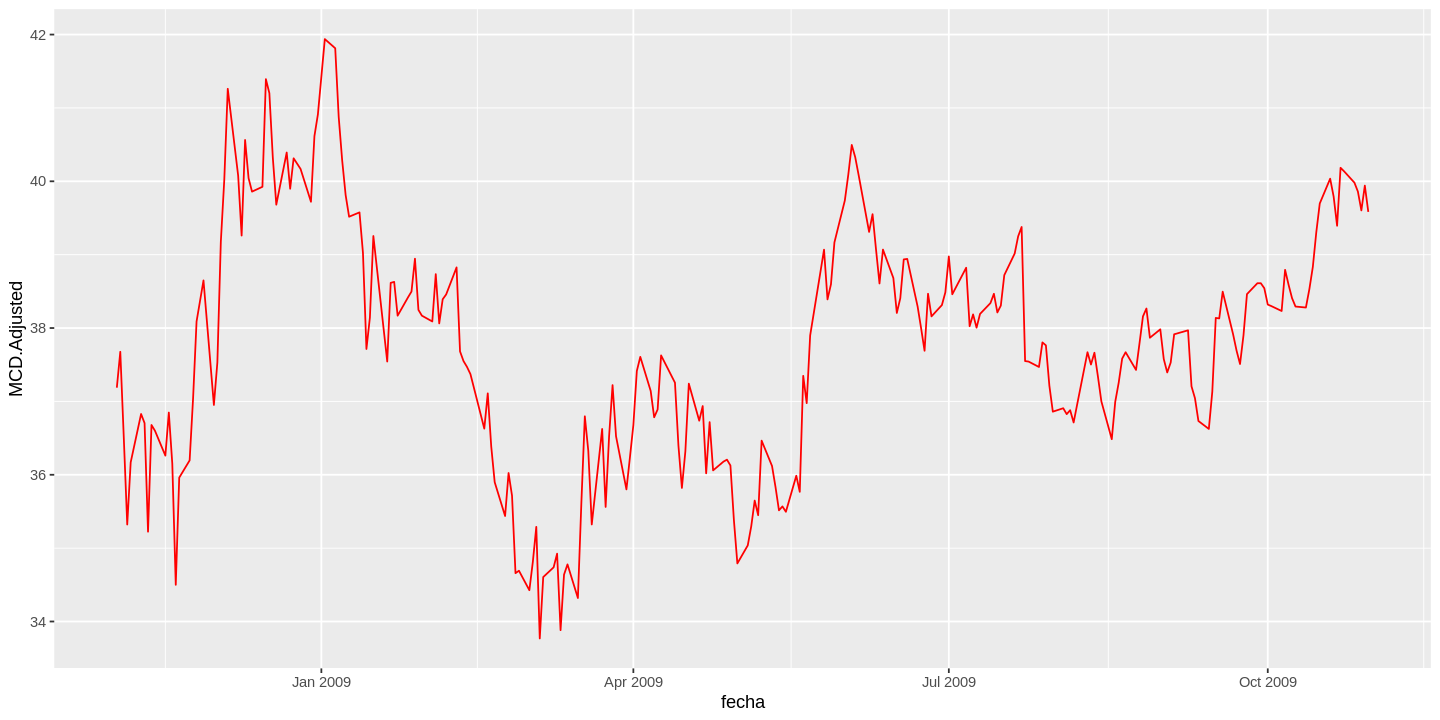

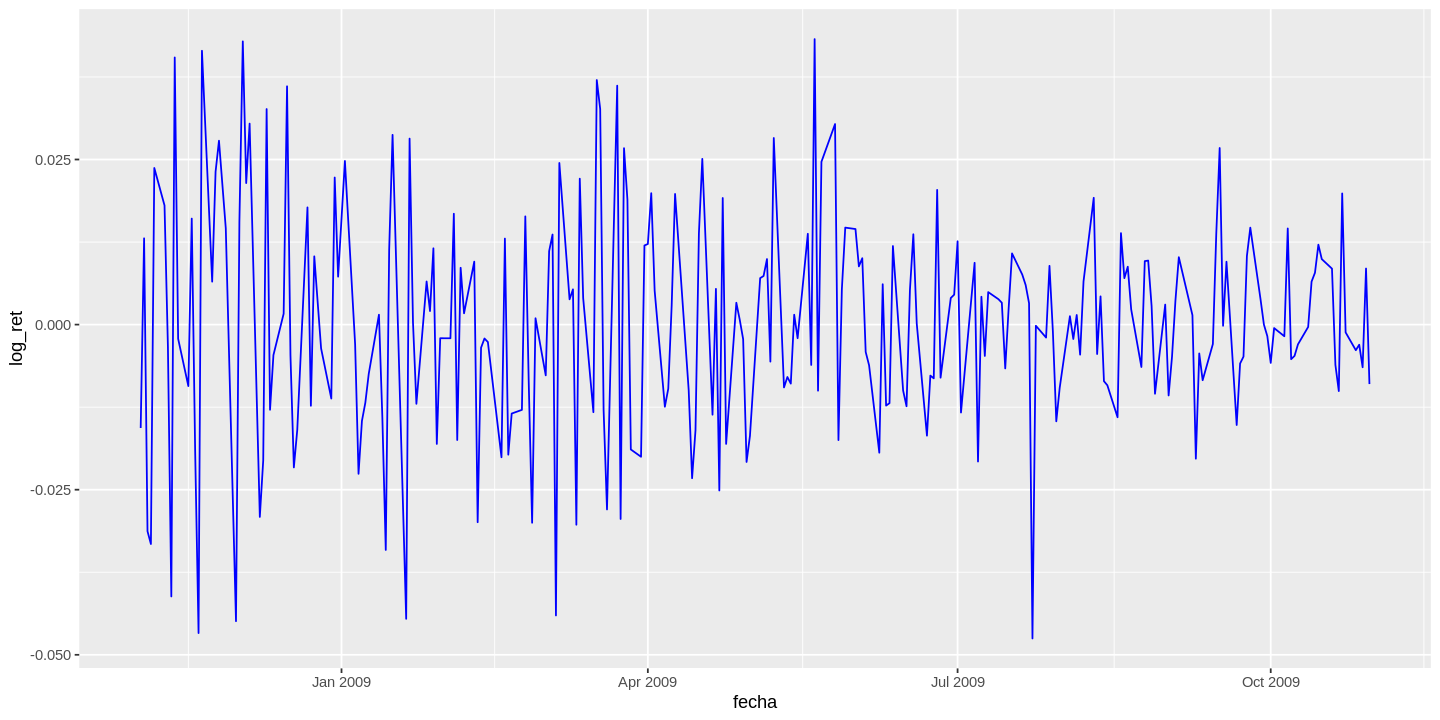

In [50]:

serie_df %>%
    filter(fecha >= "2008-11-01" & fecha <="2009-10-31" )  %>%
    ggplot() +
    aes(x = fecha, y = MCD.Adjusted) +
    geom_line(color =  "red")

serie_df %>%
    filter(fecha >= "2008-11-01" & fecha <="2009-10-31" )  %>%
    ggplot() +
    aes(x = fecha, y = log_ret) +
    geom_line(color =  "blue")

# Visualmente se aprecia un comportamiento más "errátco" en los log-retornos, en términos de que no se observan tenencias marcadas, y aparentemente la volatilidad es más homogénea a través del tiempo. Por otra parte, la media de los log-retornos se encuentra en torno al cero.

### Normalidad de los log-retornos


Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


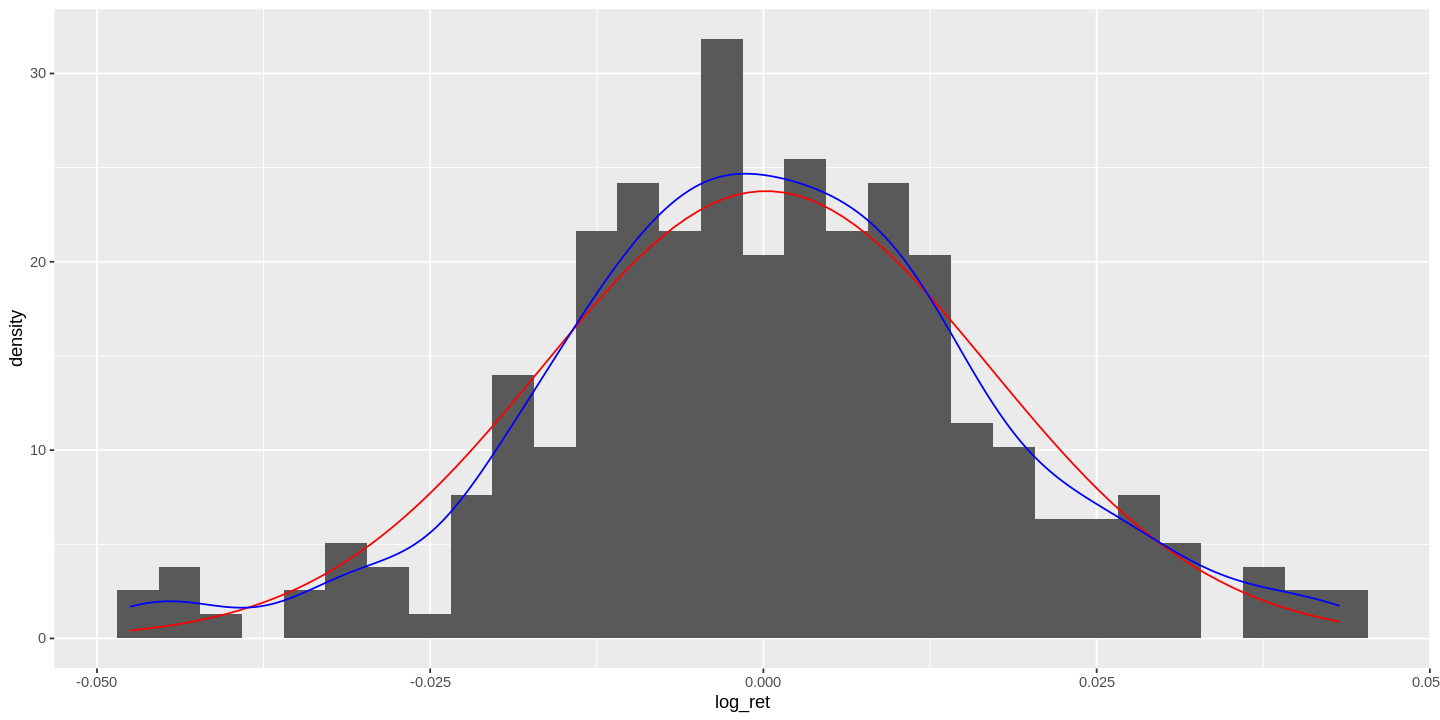


	Shapiro-Wilk normality test

data:  aux2$log_ret
W = 0.99098, p-value = 0.1244


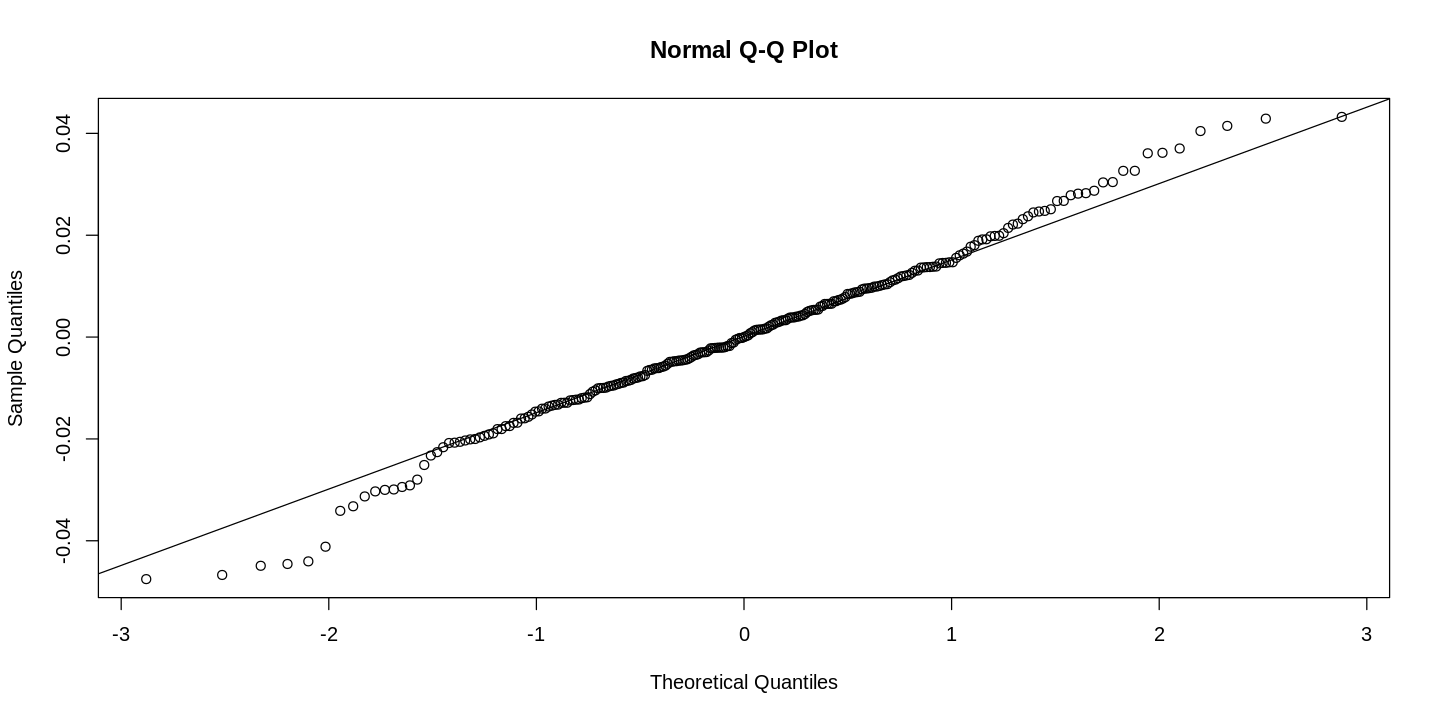

In [51]:
# histograma y densidades
aux2 <- serie_df %>%
    filter(fecha >= "2008-11-01" & fecha <="2009-10-31" )

aux2 %>%
    ggplot() +
    aes(x = log_ret) +
    geom_histogram(aes(y = ..density..))+
    stat_function(fun = function(x){
        dnorm(x,mean = mean(aux2$log_ret), sd = sd(aux2$log_ret))
    }, col = "red") +
    geom_density(col = "blue")

# qqplot
qqnorm(aux2$log_ret)
qqline(aux2$log_ret)

# test
shapiro.test(aux2$log_ret) # si bien se observan algunos posibles datos atípicos en el qqplot, el test de shapiro no rechaza la hipótesis de normalidad (al 5% de significancia), por lo que podemos asumir dicha distribucion (p-value = 0.1244 no es menor a 0.05)

## Preguntas de interés

Con el análisis previo, podemos asumir que los log-retornos del precio ajustado de las acciones en el período de observación entre 2008-11-01 y 2008-10-31 , tienen una distribución normal, con $\mu$ y $\sigma$ igual  sus estimadores muestrales (media y desv.est muestral).

**a)** Suponga que usted es inversionista y decide no vender sus acciones si la variación entre un día respecto al anterior es menor a -2%. Es decir,  $\dfrac{P_t - P_{t-1}}{P_{t-1}} < -0.02$,donde $P_t$ representa el valor ajustado de la acción al tiempo t. ¿Cuál es la probabilidad de que dicho evento ocurra? <br>



In [52]:
# a)
# Una variación del -2% respecto del día anterior, es equivalente a observar un log-retorno igual a log(1 - 0.02). Luego, bajo el supuesto de normalidad, la probabilidad  de que ocurra el evento de interés será

# a)
# Una variación del -2% respecto del día anterior, es equivalente a observar un log-retorno igual a log(1 - 0.02). Luego, bajo el supuesto de normalidad, la probabilidad  de que ocurra el evento de interés será
pnorm(log(0.98), mean = mean(aux2$log_ret), sd = sd(aux2$log_ret),lower.tail = T) # Aproximadamente en un 11% de los casos no se enderán las acciones.




[1] 0.1123635